In [1]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import tempfile

import tensorflow as tf

import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/model_one/Business_Recommenders/datacapstone_2.csv', encoding = 'latin-1')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ï»¿id,URL,Restaurant,Longitude,Latitude,Rating,Category,PriceLevel,City
0,ChIJE8Ap09bxaS4Rcy6Nszaz2r4,https://maps.google.com/?cid=13752501459651210867,Gultik blok M,106.793359,-6.243852,4.5,restaurant,INEXPENSIVE,Jakarta Barat
1,ChIJUdeM3IjxaS4RIlHsVsHC6hM,https://maps.google.com/?cid=1435173566913728802,Ok Pocha&CAFE,106.769324,-6.236957,4.3,restaurant,MODERATE,Jakarta Barat
2,ChIJlY3V4-nxaS4RjwpQazuMsD4,https://maps.google.com/?cid=4517264613083974287,Sentosa Senayan,106.807461,-6.220589,4.5,seafood_restaurant,MODERATE,Jakarta Barat
3,ChIJ2SFmLGXxaS4R6FcrUyOT3ec,https://maps.google.com/?cid=16707671972542896104,CORK&SCREW COUNTRY CLUB,106.797940,-6.225933,4.6,restaurant,EXPENSIVE,Jakarta Barat
4,ChIJwZ5UHjP3aS4RBTzWjjrqgko,https://maps.google.com/?cid=5369111243004460037,McDonald's Joglo,106.754029,-6.218802,4.5,fast_food_restaurant,MODERATE,Jakarta Barat
...,...,...,...,...,...,...,...,...,...
664,ChIJtepexZAdai4R2QsIIdy5Cw8,https://maps.google.com/?cid=1084164490410855385,Ropang Plus Plus,106.784700,-6.122139,4.4,restaurant,MODERATE,Jakarta Utara
665,ChIJCaukbXT4aS4RMsByp_appE0,https://maps.google.com/?cid=5594783513937362994,McDonald's Citra Garden 6,106.713970,-6.127720,4.5,fast_food_restaurant,MODERATE,Jakarta Utara
666,ChIJEWUwBT0eai4RFVdhcmkfKas,https://maps.google.com/?cid=12333423592281822997,Bandar Djakarta Baywalk Pluit,106.780137,-6.107938,4.5,seafood_restaurant,EXPENSIVE,Jakarta Utara
667,ChIJLUCREkwdai4RI_awze_femE,https://maps.google.com/?cid=7024172789878814243,SUJI - Suan Cai Yu | PIK,106.744217,-6.093403,4.7,chinese_restaurant,EXPENSIVE,Jakarta Utara


In [3]:
# Query data

# ID
df_id = df[["ï»¿id"]]
df_id = df_id.reset_index()

# URL
df_url = df[["URL"]]
df_url = df_url.reset_index()


# Price
df_price = df[["PriceLevel"]]
df_price = df_price.reset_index()


# long user and resto
df_long = df[["Longitude"]]
df_long_user = df_long.reset_index()

# lat user and resto
df_lat = df[["Latitude"]]
df_lat = df_lat.reset_index()


# rating resto
df_rating_resto = df[["Rating"]]
df_rating_resto = df_rating_resto.reset_index()

# kategori resto
df_kategori = df[["Category"]]
df_kategori = df_kategori.reset_index()


# kandidat
# nama resto kandidat
df_nama_kandidat = pd.DataFrame()
df_nama_kandidat['Restaurant'] = df[['Restaurant']]

In [4]:
user_input = pd.DataFrame()

user_input['price'], user_input['longitude'], user_input['latitude'], user_input['rating'], user_input['kategori'], user_input['Restaurant'], user_input['url'], user_input['id'] = df_price.loc[:, 'PriceLevel'], df_long.loc[:, 'Longitude'], df_lat.loc[:, 'Latitude'], df_rating_resto.loc[:, 'Rating'], df_kategori.loc[:, 'Category'], df_nama_kandidat.loc[:, 'Restaurant'], df_url.loc[:, 'URL'], df_id.loc[:, 'ï»¿id']

In [5]:
user_input = user_input.reset_index()
print(user_input)

     index        price   longitude  latitude  rating              kategori  \
0        0  INEXPENSIVE  106.793359 -6.243852     4.5            restaurant   
1        1     MODERATE  106.769324 -6.236957     4.3            restaurant   
2        2     MODERATE  106.807461 -6.220589     4.5    seafood_restaurant   
3        3    EXPENSIVE  106.797940 -6.225933     4.6            restaurant   
4        4     MODERATE  106.754029 -6.218802     4.5  fast_food_restaurant   
..     ...          ...         ...       ...     ...                   ...   
664    664     MODERATE  106.784700 -6.122139     4.4            restaurant   
665    665     MODERATE  106.713970 -6.127720     4.5  fast_food_restaurant   
666    666    EXPENSIVE  106.780137 -6.107938     4.5    seafood_restaurant   
667    667    EXPENSIVE  106.744217 -6.093403     4.7    chinese_restaurant   
668    668     MODERATE  106.756096 -6.116785     4.5  fast_food_restaurant   

                         Restaurant  \
0           

In [6]:
# kandidat
# nama resto kandidat

df_nama_kandidat

,Restaurant
0,Gultik blok M
1,Ok Pocha&CAFE
2,Sentosa Senayan
3,CORK&SCREW COUNTRY CLUB
4,McDonald's Joglo
...,...
664,Ropang Plus Plus
665,McDonald's Citra Garden 6
666,Bandar Djakarta Baywalk Pluit
667,SUJI - Suan Cai Yu | PIK


In [7]:
print(user_input.dtypes)

index           int64
price          object
longitude     float64
latitude      float64
rating        float64
kategori       object
Restaurant     object
url            object
id             object
dtype: object


In [8]:
print(df_nama_kandidat.dtypes)

Restaurant    object
dtype: object


In [9]:
#features user_input
features_user = tf.data.Dataset.from_tensor_slices(dict(user_input))
features_user

<_TensorSliceDataset element_spec={'index': TensorSpec(shape=(), dtype=tf.int64, name=None), 'price': TensorSpec(shape=(), dtype=tf.string, name=None), 'longitude': TensorSpec(shape=(), dtype=tf.float64, name=None), 'latitude': TensorSpec(shape=(), dtype=tf.float64, name=None), 'rating': TensorSpec(shape=(), dtype=tf.float64, name=None), 'kategori': TensorSpec(shape=(), dtype=tf.string, name=None), 'Restaurant': TensorSpec(shape=(), dtype=tf.string, name=None), 'url': TensorSpec(shape=(), dtype=tf.string, name=None), 'id': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [10]:
# features nama resto
features_resto = tf.data.Dataset.from_tensor_slices(dict(df_nama_kandidat))
features_resto = features_resto.map(lambda x: x["Restaurant"])

In [11]:
features_resto

<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [12]:
# Unique user_input features

#longitude user
longitude_train = np.concatenate(list(features_user.map(lambda x: x["longitude"]).batch(50)))
max_long = longitude_train.max()
min_long = longitude_train.min()

long_buckets = np.linspace(
    min_long , max_long , num=1000,
)


#latitude user
latitude_train = np.concatenate(list(features_user.map(lambda x: x["latitude"]).batch(50)))
max_lat = latitude_train.max()
min_lat = latitude_train.min()

lat_buckets = np.linspace(
    min_lat , max_lat , num=1000,
)


# rating
input_rating = np.concatenate(list(features_user.map(lambda x: x["rating"]).batch(100)))
max_rating = input_rating.max()
min_rating = input_rating.min()

rating_buckets = np.linspace(
    min_rating , max_rating , num=1000,
)


unique_kategori = np.unique(np.concatenate(list(features_user.batch(100).map(
    lambda x: x["kategori"]
))))
unique_price = np.unique(np.concatenate(list(features_user.batch(100).map(
    lambda x: x["price"]
))))


#kandidat
unique_kandidat = np.unique(np.concatenate(list(features_resto.batch(100))))

In [13]:
class UserModel(tf.keras.Model):

  def __init__(self):
    super().__init__()

    max_tokens = 10_000

    # price embedding
    self.price_embedding = tf.keras.Sequential([
        tf.keras.layers.StringLookup(vocabulary=unique_price, mask_token=None),
        tf.keras.layers.Embedding(len(unique_price) + 1, 32),
    ])
    self.price_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens)
    self.price_text_embedding = tf.keras.Sequential([
      self.price_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D(),
    ])
    self.price_vectorizer.adapt(features_user.map(lambda x: x["price"]))


    # longitude resto
    self.long_embedding = tf.keras.Sequential([
        tf.keras.layers.Discretization(long_buckets.tolist()),
        tf.keras.layers.Embedding(len(long_buckets) + 1, 32),
    ])
    self.normalized_long = tf.keras.layers.Normalization(
        axis=None
    )
    self.normalized_long.adapt(features_user.map(lambda x: x["longitude"]))

    # latitude resto
    self.lat_embedding = tf.keras.Sequential([
        tf.keras.layers.Discretization(lat_buckets.tolist()),
        tf.keras.layers.Embedding(len(lat_buckets) + 1, 32),
    ])
    self.normalized_lat = tf.keras.layers.Normalization(
        axis=None
    )
    self.normalized_lat.adapt(features_user.map(lambda x: x["latitude"]))

    # rating
    self.rating_embedding = tf.keras.Sequential([
        tf.keras.layers.Discretization(rating_buckets.tolist()),
        tf.keras.layers.Embedding(len(rating_buckets) + 1, 32),
    ])
    self.normalized_rating = tf.keras.layers.Normalization(
        axis=None
    )
    self.normalized_rating.adapt(features_user.map(lambda x: x["rating"]))

  def call(self, inputs):
    return tf.concat([
        self.price_embedding(inputs["price"]),
        self.price_text_embedding(inputs["price"]),
        self.long_embedding(inputs["longitude"]),
        tf.reshape(self.normalized_long(inputs["longitude"]), (-1, 1)),
        self.lat_embedding(inputs["latitude"]),
        tf.reshape(self.normalized_lat(inputs["latitude"]), (-1, 1)),
        self.rating_embedding(inputs["rating"]),
        tf.reshape(self.normalized_rating(inputs["rating"]), (-1, 1)),
        ], axis=1)



In [14]:
class QueryModel(tf.keras.Model):

  def __init__(self, layer_sizes):

    super().__init__()
    self.embedding_model = UserModel()

    self.dense_layers = tf.keras.Sequential()

    for layer_size in layer_sizes[:-1]:
      self.dense_layers.add(tf.keras.layers.Dense(layer_size, activation="relu"))
      self.dense_layers.add(tf.keras.layers.Dense(128, activation="relu"))
      self.dense_layers.add(tf.keras.layers.Dense(256, activation="relu"))
    for layer_size in layer_sizes[-1:]:
      self.dense_layers.add(tf.keras.layers.Dense(layer_size))

  def call(self, inputs):
    feature_embedding = self.embedding_model(inputs)
    return self.dense_layers(feature_embedding)

In [15]:
class restoModel(tf.keras.Model):

  def __init__(self):
    super().__init__()

    max_tokens = 10_000

    self.resto_embedding = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
          vocabulary=unique_kandidat,mask_token=None),
      tf.keras.layers.Embedding(len(unique_kandidat) + 1, 32)
    ])

    self.resto_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens)

    self.resto_text_embedding = tf.keras.Sequential([
      self.resto_vectorizer,
      tf.keras.layers.Embedding(max_tokens, 32, mask_zero=True),
      tf.keras.layers.GlobalAveragePooling1D(),
    ])

    self.resto_vectorizer.adapt(features_resto)

  def call(self, titles):
    return tf.concat([
        self.resto_embedding(titles),
        self.resto_text_embedding(titles),
    ], axis=1)

In [16]:
class CandidateModel(tf.keras.Model):
  def __init__(self, layer_sizes):
    super().__init__()

    self.embedding_model = restoModel()

    self.dense_layers = tf.keras.Sequential()

    for layer_size in layer_sizes[:-1]:
      self.dense_layers.add(tf.keras.layers.Dense(layer_size, activation="relu"))
      self.dense_layers.add(tf.keras.layers.Dense(128, activation="relu"))
      self.dense_layers.add(tf.keras.layers.Dense(256, activation="relu"))

    for layer_size in layer_sizes[-1:]:
      self.dense_layers.add(tf.keras.layers.Dense(layer_size))

  def call(self, inputs):
    feature_embedding = self.embedding_model(inputs)
    return self.dense_layers(feature_embedding)

In [17]:
class RestoRecModel(tfrs.models.Model):

  def __init__(self, layer_sizes):
    super().__init__()
    self.query_model = QueryModel(layer_sizes)
    self.candidate_model = CandidateModel(layer_sizes)
    self.task = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=features_resto.batch(512).map(self.candidate_model),
        ),
    )

  def compute_loss(self, features, training=False):

    query_embeddings = self.query_model({
        "price": features["price"],
        "longitude": features["longitude"],
        "latitude": features["latitude"],
        "rating": features["rating"],
    })
    resto_embeddings = self.candidate_model(features["Restaurant"])

    return self.task(
        query_embeddings, resto_embeddings, compute_metrics=not training)

In [18]:
tf.random.set_seed(42)
shuffled = features_user.shuffle(600, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(600)
test = shuffled.skip(600).take(68)

cached_train = train.shuffle(400).batch(32)
cached_test = test.batch(16).cache()

In [31]:
num_epochs = 250

model = RestoRecModel([256, 128])
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.011))

one_layer_history = model.fit(
    cached_train,
    validation_data=cached_test,
    # validation_freq=5,
    epochs=num_epochs,
    verbose=1)

accuracy = one_layer_history.history["val_factorized_top_k/top_100_categorical_accuracy"][-1]
print(f"Top-100 accuracy: {accuracy:.2f}.")

Epoch 1/250
19/19 [==============================] - 3s 79ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - loss: 107.4014 - regularization_loss: 0.0000e+00 - total_loss: 107.4014 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0441 - val_factorized_top_k/top_50_categorical_accuracy: 0.1176 - val_factorized_top_k/top_100_categorical_accuracy: 0.2206 - val_loss: 5.5116 - val_regularization_loss: 0.0000e+00 - val_total_loss: 5.5116
Epoch 2/250
19/19 [==============================] - 2s 84ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 

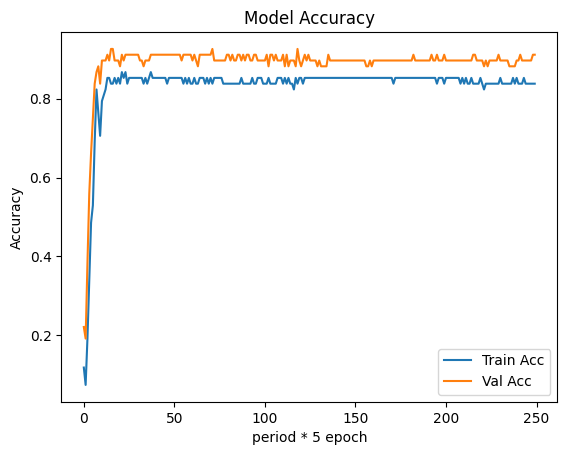

In [32]:
plt.plot(one_layer_history.history['val_factorized_top_k/top_50_categorical_accuracy'])
plt.plot(one_layer_history.history['val_factorized_top_k/top_100_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train Acc', 'Val Acc'])
plt.xlabel('period * 5 epoch')
plt.show()

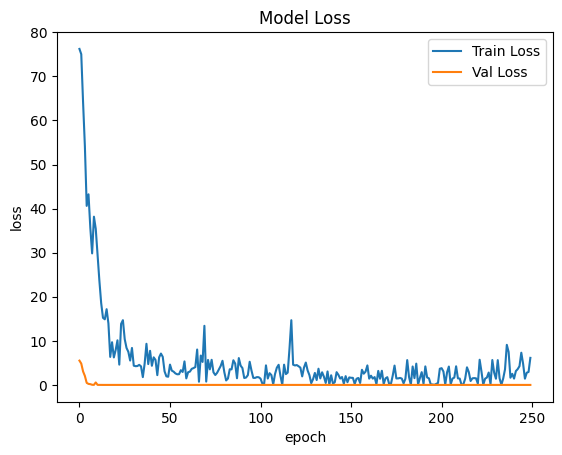

In [33]:
plt.plot(one_layer_history.history['total_loss'])
plt.plot(one_layer_history.history['val_total_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('epoch')
plt.show()

In [22]:
#model = RestoRecModel([64, 32])

In [38]:
index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
index.index_from_dataset(
  tf.data.Dataset.zip((features_resto.batch(100), features_resto.batch(100).map(model.candidate_model)))
)
_, titles = index({
    "price": np.array(['MODERATE']),
    "longitude": np.array([106.792142]),
    "latitude": np.array([-6.189713]),
    "rating": np.array([4.7]),
     },
    k=15
)

In [39]:
x = titles[0].numpy()
decoded_titles = []
for element in x:
    decoded_titles.append(element.decode())

decoded_titles

['Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Seribu Rasa Menteng',
 'Seribu Rasa Menteng',
 'Seribu Rasa Menteng',
 'Seribu Rasa Menteng',
 "Michael's Garden Cafe",
 "Michael's Garden Cafe",
 "Michael's Garden Cafe"]

In [40]:
df = user_input[user_input['Restaurant'].isin(decoded_titles)]

print(df)

     index      price   longitude  latitude  rating               kategori  \
13      13   MODERATE  106.734685 -6.189787     4.8             restaurant   
35      35   MODERATE  106.734685 -6.189787     4.8             restaurant   
61      61   MODERATE  106.734685 -6.189787     4.8             restaurant   
69      69   MODERATE  106.734685 -6.189787     4.8             restaurant   
134    134   MODERATE  106.840668 -6.176697     4.6             restaurant   
143    143   MODERATE  106.840668 -6.176697     4.6             restaurant   
156    156   MODERATE  106.840668 -6.176697     4.6             restaurant   
172    172  EXPENSIVE  106.825040 -6.195501     4.6  indonesian_restaurant   
173    173   MODERATE  106.840668 -6.176697     4.6             restaurant   
187    187   MODERATE  106.840668 -6.176697     4.6             restaurant   
189    189  EXPENSIVE  106.825040 -6.195501     4.6  indonesian_restaurant   
198    198   MODERATE  106.840668 -6.176697     4.6             

In [37]:
save_directory = "/content/gdrive/MyDrive/Colab Notebooks/model_one/Business_Recommenders"

if not os.path.exists(save_directory):
    os.makedirs(save_directory)

path = os.path.join(save_directory, "Recommenders_Model")

tf.saved_model.save(index, path)

loaded = tf.saved_model.load(path)

_, rekomendasi = loaded({
    "price": np.array(["MODERATE"]),
    "longitude": tf.constant([106.792142], dtype=tf.float32),
    "latitude": tf.constant([-6.189713], dtype=tf.float32),
    "rating": tf.constant([4.7], dtype=tf.float32)
})

print(f"Recommendations: {rekomendasi[0][:10]}")

Recommendations: [b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Seribu Rasa Menteng' b'Seribu Rasa Menteng']


In [41]:
# Pass user id in, get top predicted movie titles back.
_, rekomendasi = loaded({
    "price": np.array(["MODERATE"]),
    "longitude": np.array([106.792142], dtype=np.float32),
    "latitude": np.array([-6.189713], dtype=np.float32),
    "rating": np.array([4.7], dtype=np.float32)
})

print(f"Recommendations: {rekomendasi[0][:10]}")

Recommendations: [b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Jurnal Risa Coffee Atrium' b'Jurnal Risa Coffee Atrium'
 b'Seribu Rasa Menteng' b'Seribu Rasa Menteng']


In [42]:
x = rekomendasi[0].numpy()
decoded_titles = []
for element in x:
    decoded_titles.append(element.decode())

decoded_titles

['Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Jurnal Risa Coffee Atrium',
 'Seribu Rasa Menteng',
 'Seribu Rasa Menteng']

In [43]:
info_df = user_input[user_input['Restaurant'].isin(decoded_titles)]

print(info_df)

     index      price   longitude  latitude  rating               kategori  \
134    134   MODERATE  106.840668 -6.176697     4.6             restaurant   
143    143   MODERATE  106.840668 -6.176697     4.6             restaurant   
156    156   MODERATE  106.840668 -6.176697     4.6             restaurant   
172    172  EXPENSIVE  106.825040 -6.195501     4.6  indonesian_restaurant   
173    173   MODERATE  106.840668 -6.176697     4.6             restaurant   
187    187   MODERATE  106.840668 -6.176697     4.6             restaurant   
189    189  EXPENSIVE  106.825040 -6.195501     4.6  indonesian_restaurant   
198    198   MODERATE  106.840668 -6.176697     4.6             restaurant   
222    222  EXPENSIVE  106.825040 -6.195501     4.6  indonesian_restaurant   
223    223   MODERATE  106.840668 -6.176697     4.6             restaurant   
234    234   MODERATE  106.840668 -6.176697     4.6             restaurant   
388    388  EXPENSIVE  106.825040 -6.195501     4.6  indonesian_

In [44]:
new_info_df = info_df.drop(columns = 'index')
new_info_df

,price,longitude,latitude,rating,kategori,Restaurant,url,id
134,MODERATE,106.840668,-6.176697,4.6,restaurant,Jurnal Risa Coffee Atrium,https://maps.google.com/?cid=16870954203956094150,ChIJA6Y6ZAT1aS4RxqSvXHarIeo
143,MODERATE,106.840668,-6.176697,4.6,restaurant,Jurnal Risa Coffee Atrium,https://maps.google.com/?cid=16870954203956094150,ChIJA6Y6ZAT1aS4RxqSvXHarIeo
156,MODERATE,106.840668,-6.176697,4.6,restaurant,Jurnal Risa Coffee Atrium,https://maps.google.com/?cid=16870954203956094150,ChIJA6Y6ZAT1aS4RxqSvXHarIeo
172,EXPENSIVE,106.825040,-6.195501,4.6,indonesian_restaurant,Seribu Rasa Menteng,https://maps.google.com/?cid=2475497441655702942,ChIJR2I0yCX0aS4RnsVGtM67WiI
173,MODERATE,106.840668,-6.176697,4.6,restaurant,Jurnal Risa Coffee Atrium,https://maps.google.com/?cid=16870954203956094150,ChIJA6Y6ZAT1aS4RxqSvXHarIeo
187,MODERATE,106.840668,-6.176697,4.6,restaurant,Jurnal Risa Coffee Atrium,https://maps.google.com/?cid=16870954203956094150,ChIJA6Y6ZAT1aS4RxqSvXHarIeo
189,EXPENSIVE,106.825040,-6.195501,4.6,indonesian_restaurant,Seribu Rasa Menteng,https://maps.google.com/?cid=2475497441655702942,ChIJR2I0yCX0aS4RnsVGtM67WiI
198,MODERATE,106.840668,-6.176697,4.6,restaurant,Jurnal Risa Coffee Atrium,https://maps.google.com/?cid=16870954203956094150,ChIJA6Y6ZAT1aS4RxqSvXHarIeo
222,EXPENSIVE,106.825040,-6.195501,4.6,indonesian_restaurant,Seribu Rasa Menteng,https://maps.google.com/?cid=2475497441655702942,ChIJR2I0yCX0aS4RnsVGtM67WiI
223,MODERATE,106.840668,-6.176697,4.6,restaurant,Jurnal Risa Coffee Atrium,https://maps.google.com/?cid=16870954203956094150,ChIJA6Y6ZAT1aS4RxqSvXHarIeo


In [45]:
json_info = new_info_df.to_json(orient="index")
json_info

'{"134":{"price":"MODERATE","longitude":106.8406679,"latitude":-6.1766973,"rating":4.6,"kategori":"restaurant","Restaurant":"Jurnal Risa Coffee Atrium","url":"https:\\/\\/maps.google.com\\/?cid=16870954203956094150","id":"ChIJA6Y6ZAT1aS4RxqSvXHarIeo"},"143":{"price":"MODERATE","longitude":106.8406679,"latitude":-6.1766973,"rating":4.6,"kategori":"restaurant","Restaurant":"Jurnal Risa Coffee Atrium","url":"https:\\/\\/maps.google.com\\/?cid=16870954203956094150","id":"ChIJA6Y6ZAT1aS4RxqSvXHarIeo"},"156":{"price":"MODERATE","longitude":106.8406679,"latitude":-6.1766973,"rating":4.6,"kategori":"restaurant","Restaurant":"Jurnal Risa Coffee Atrium","url":"https:\\/\\/maps.google.com\\/?cid=16870954203956094150","id":"ChIJA6Y6ZAT1aS4RxqSvXHarIeo"},"172":{"price":"EXPENSIVE","longitude":106.8250395,"latitude":-6.1955014,"rating":4.6,"kategori":"indonesian_restaurant","Restaurant":"Seribu Rasa Menteng","url":"https:\\/\\/maps.google.com\\/?cid=2475497441655702942","id":"ChIJR2I0yCX0aS4RnsVGtM6

In [46]:
json_a_info = new_info_df.to_dict(orient = 'index')
json_a_info

{134: {'price': 'MODERATE',
  'longitude': 106.8406679,
  'latitude': -6.1766973,
  'rating': 4.6,
  'kategori': 'restaurant',
  'Restaurant': 'Jurnal Risa Coffee Atrium',
  'url': 'https://maps.google.com/?cid=16870954203956094150',
  'id': 'ChIJA6Y6ZAT1aS4RxqSvXHarIeo'},
 143: {'price': 'MODERATE',
  'longitude': 106.8406679,
  'latitude': -6.1766973,
  'rating': 4.6,
  'kategori': 'restaurant',
  'Restaurant': 'Jurnal Risa Coffee Atrium',
  'url': 'https://maps.google.com/?cid=16870954203956094150',
  'id': 'ChIJA6Y6ZAT1aS4RxqSvXHarIeo'},
 156: {'price': 'MODERATE',
  'longitude': 106.8406679,
  'latitude': -6.1766973,
  'rating': 4.6,
  'kategori': 'restaurant',
  'Restaurant': 'Jurnal Risa Coffee Atrium',
  'url': 'https://maps.google.com/?cid=16870954203956094150',
  'id': 'ChIJA6Y6ZAT1aS4RxqSvXHarIeo'},
 172: {'price': 'EXPENSIVE',
  'longitude': 106.8250395,
  'latitude': -6.1955014,
  'rating': 4.6,
  'kategori': 'indonesian_restaurant',
  'Restaurant': 'Seribu Rasa Menteng',
